# Small-scale analysis of the tracklet data: does direct alignment-based pose refinement work?

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
%matplotlib inline

In [35]:
from matplotlib import rc
# Enable full LaTeX support in plot text. Requires a full-fledged LaTeX installation
# on your system, accessible via PATH.
# rc('text', usetex=True)

plt.rcParams["figure.figsize"] = (16, 6)

In [42]:
%%bash
ls -t ../cmake-build-debug/*-3d-tracking-result.csv | head -n5

../cmake-build-debug/kitti-tracking-sequence-0006-tracking-dataset-offset-0-depth-precomputed-dispnet-voxelsize-0.0500-max-depth-m-20.00-with-direct-ref-3d-tracking-result.csv
../cmake-build-debug/kitti-tracking-sequence-0006-tracking-dataset-offset-0-depth-precomputed-dispnet-voxelsize-0.0500-max-depth-m-20.00-NO-direct-ref-3d-tracking-result.csv
../cmake-build-debug/kitti-tracking-sequence-0006-tracking-dataset-offset-0-depth-precomputed-elas-voxelsize-0.0500-max-depth-m-20.00-with-direct-ref-3d-tracking-result.csv
../cmake-build-debug/kitti-tracking-sequence-0006-tracking-dataset-offset-0-depth-precomputed-elas-voxelsize-0.0500-max-depth-m-20.00-3d-tracking-result.csv


In [56]:
CSV_FILE_DN_NO_DIRECT = "../cmake-build-debug/kitti-tracking-sequence-0006-tracking-dataset-offset-0-depth-precomputed-dispnet-voxelsize-0.0500-max-depth-m-20.00-NO-direct-ref-3d-tracking-result.csv"
CSV_FILE_DN_WITH_DIRECT = "../cmake-build-debug/kitti-tracking-sequence-0006-tracking-dataset-offset-0-depth-precomputed-dispnet-voxelsize-0.0500-max-depth-m-20.00-with-direct-ref-3d-tracking-result-no-param-tweaks.csv"
CSV_FILE_DN_WITH_DIRECT_TWEAKED = "../cmake-build-debug/kitti-tracking-sequence-0006-tracking-dataset-offset-0-depth-precomputed-dispnet-voxelsize-0.0500-max-depth-m-20.00-with-direct-ref-3d-tracking-result-<todo>.csv"

In [58]:
dn_no_direct_frame = pd.read_csv(CSV_FILE_DN_NO_DIRECT)
dn_direct_frame = pd.read_csv(CSV_FILE_DN_WITH_DIRECT)
print(len(dn_no_direct_frame), len(dn_direct_frame))
# dn_no_direct_frame

56 56


In [59]:
dn_no_direct_frame.head()

,frame_id,track_id,trans_error,rot_error
0,43,2,0.137243,0.022683
1,44,2,0.084931,0.008583
2,45,2,0.071146,0.014435
3,46,2,0.059743,0.009506
4,47,2,0.013864,0.001544


In [60]:
dn_direct_frame.head()

,frame_id,track_id,trans_error,rot_error
0,43,2,0.137243,0.022683
1,44,2,0.290606,0.036613
2,45,2,0.276341,0.031502
3,46,2,0.260395,0.029782
4,47,2,0.174290,0.014278


In [61]:
# dn_no_direct_frame[dn_no_direct_frame['frame_id'] == 43]
# dn_no_direct_frame[dn_no_direct_frame['track_id'] == 2]

# dn_no_direct_frame['track_id']


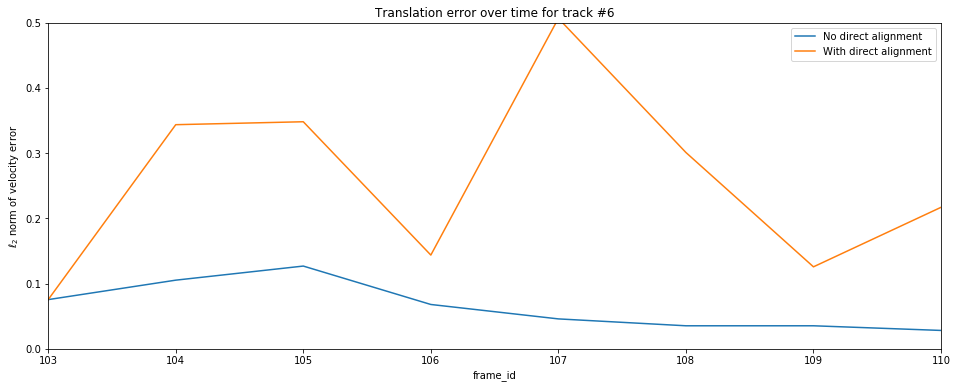

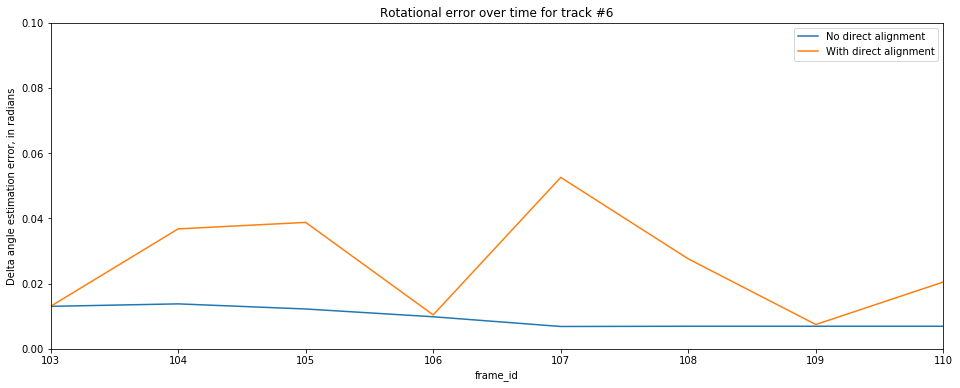

In [62]:
def compare_tracks(no_direct_frame, direct_frame, track_id=6):
    nd_track = no_direct_frame[no_direct_frame.track_id == track_id]
    d_track = direct_frame[direct_frame.track_id == track_id]
    result = pd.DataFrame({
        'frame_id': nd_track.frame_id,
        'trans_error_no_direct': nd_track.trans_error,
        'rot_error_no_direct': nd_track.rot_error,
        'trans_error_with_direct': d_track.trans_error,
        'rot_error_with_direct': d_track.rot_error
    })
    ax = result.plot('frame_id', ['trans_error_no_direct', 'trans_error_with_direct'])
    ax.set_ylim([0, 0.5])
    ax.set_ylabel(r"$\ell_2$ norm of velocity error")
    ax.set_title("Translation error over time for track #{}".format(track_id))
    ax.legend(["No direct alignment", "With direct alignment"])
    
    ax = result.plot('frame_id', ['rot_error_no_direct', 'rot_error_with_direct'])
    ax.set_ylim([0, 0.1])
    ax.set_ylabel("Delta angle estimation error, in radians")
    ax.set_title("Rotational error over time for track #{}".format(track_id))
    ax.legend(["No direct alignment", "With direct alignment"])

compare_tracks(dn_no_direct_frame, dn_direct_frame)